In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../../Datasets/COVID/CDC_All_Deaths.csv')

In [7]:
data.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Age Group,Number of Deaths,Time Period,Type,Suppress,Note
0,Alabama,1/10/15,AL,2015,1,25-44 years,67,2015-2019,Predicted (weighted),NaN,NaN
1,Alabama,1/17/15,AL,2015,2,25-44 years,49,2015-2019,Predicted (weighted),NaN,NaN
2,Alabama,1/24/15,AL,2015,3,25-44 years,55,2015-2019,Predicted (weighted),NaN,NaN
3,Alabama,1/31/15,AL,2015,4,25-44 years,59,2015-2019,Predicted (weighted),NaN,NaN
4,Alabama,2/7/15,AL,2015,5,25-44 years,47,2015-2019,Predicted (weighted),NaN,NaN


In [8]:
data.drop(['Time Period', 'Type', 'Suppress', 'Note'], axis = 1, inplace = True)

In [9]:
data.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Age Group,Number of Deaths
0,Alabama,1/10/15,AL,2015,1,25-44 years,67
1,Alabama,1/17/15,AL,2015,2,25-44 years,49
2,Alabama,1/24/15,AL,2015,3,25-44 years,55
3,Alabama,1/31/15,AL,2015,4,25-44 years,59
4,Alabama,2/7/15,AL,2015,5,25-44 years,47


In [10]:
data.index = data['Week']
data.drop('Week', axis = 1, inplace = True)

In [11]:
data.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Age Group,Number of Deaths
Week,,,,,,
1,Alabama,1/10/15,AL,2015,25-44 years,67
2,Alabama,1/17/15,AL,2015,25-44 years,49
3,Alabama,1/24/15,AL,2015,25-44 years,55
4,Alabama,1/31/15,AL,2015,25-44 years,59
5,Alabama,2/7/15,AL,2015,25-44 years,47


In [12]:
data_2015 = data[(data['Year'] == 2015)]
data_2016 = data[(data['Year'] == 2016)]
data_2017 = data[(data['Year'] == 2017)]
data_2018 = data[(data['Year'] == 2018)]
data_2019 = data[(data['Year'] == 2019)]
data_2020 = data[(data['Year'] == 2020)]

In [13]:
data_2020.tail()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Age Group,Number of Deaths
Week,,,,,,
21,Wyoming,5/23/20,WY,2020,85 years and older,30
22,Wyoming,5/30/20,WY,2020,85 years and older,22
23,Wyoming,6/6/20,WY,2020,85 years and older,28
24,Wyoming,6/13/20,WY,2020,85 years and older,28
25,Wyoming,6/20/20,WY,2020,85 years and older,29


In [14]:
total_deaths_2015 = data_2015.groupby('Week')[['Number of Deaths']].sum()
total_deaths_2016 = data_2016.groupby('Week')[['Number of Deaths']].sum()
total_deaths_2017 = data_2017.groupby('Week')[['Number of Deaths']].sum()
total_deaths_2018 = data_2018.groupby('Week')[['Number of Deaths']].sum()
total_deaths_2019 = data_2019.groupby('Week')[['Number of Deaths']].sum()
total_deaths_2020 = data_2020.groupby('Week')[['Number of Deaths']].sum()

In [15]:
total_deaths_2015.head()

,Number of Deaths
Week,
1,124193
2,122955
3,117981
4,115123
5,115203


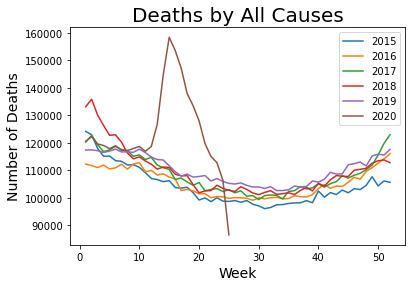

In [16]:
plt.plot(total_deaths_2015.index, total_deaths_2015['Number of Deaths'], label="2015")
plt.plot(total_deaths_2016.index, total_deaths_2016['Number of Deaths'], label="2016")
plt.plot(total_deaths_2017.index, total_deaths_2017['Number of Deaths'], label="2017")
plt.plot(total_deaths_2018.index, total_deaths_2018['Number of Deaths'], label="2018")
plt.plot(total_deaths_2019.index, total_deaths_2019['Number of Deaths'], label="2019")
plt.plot(total_deaths_2020.index, total_deaths_2020['Number of Deaths'], label="2020")

plt.legend()

plt.title("Deaths by All Causes", fontsize=20)

plt.xlabel("Week", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14);

## Let's Simplify with a For Loop

### First, find the years available in the data set

In [19]:
data = pd.read_csv('../../Datasets/COVID/CDC_All_Deaths.csv')

years = data[(data['Jurisdiction']== 'Illinois') ]
years = years.drop_duplicates('Year')
years = years['Year']
for year in years:
    print(year)

2015
2016
2017
2018
2019
2020


## Now for each year
 - Get the data for that year
 - Sum up the number of deaths per week
 - Plot them on a graph

Text(0, 0.5, 'Number of Deaths')

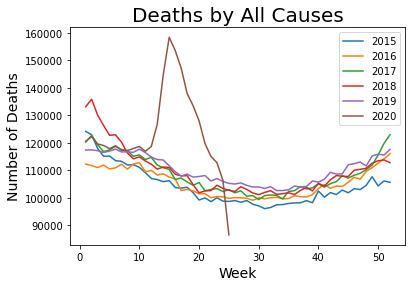

In [20]:
for year in years:
    data_by_year = data[(data['Year'] == year)]
    deaths_by_year = data_by_year.groupby('Week')[['Number of Deaths']].sum()
    plt.plot(deaths_by_year.index, deaths_by_year['Number of Deaths'], label=year)
    
plt.legend()

plt.title("Deaths by All Causes", fontsize=20)

plt.xlabel("Week", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)